In [1]:
import geopandas as gpd

In [2]:
titleVI = gpd.read_file(r'T:\MPO\Title VI & EJ\2023_TitleVI_update\Maps\MPO_BG_TitleVI.shp')

In [3]:
filepath = r'T:\DCProjects\Support\SPR\BikeRacks\SPR_BG_HH0Car_Poverty\SPR_BG_HH0Car_Poverty'

In [4]:
titleVI_SPR = gpd.read_file(filepath + '.shp')

In [5]:
[ID for ID in titleVI_SPR.BlkGrp10.values if ID not in titleVI.BlkGrp20.values]

['410390001001', '410390021021', '410390021022', '410390021023']

In [6]:
newlist = ['410390021031', '410390021032', '410390021041', '410390021042', 
           '410390020023', '410390002001', '410390002004', '410390001003']

In [7]:
IDs = list(titleVI_SPR.BlkGrp10.values) + newlist

In [8]:
titleVI_SPR.drop(columns = 'BlkGrp10', inplace=True)

In [9]:
titleVI_SPR.drop(columns = ['Shape_Leng', 'Shape_Area'], inplace=True)

In [10]:
cols = ['BlkGrp20'] + list(titleVI_SPR.columns)

In [11]:
titleVI_SPR2 = titleVI[titleVI.BlkGrp20.isin(IDs)][cols]

<AxesSubplot:>

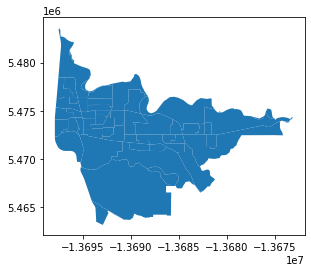

In [12]:
titleVI_SPR2.plot()

In [13]:
titleVI_SPR2.columns

Index(['BlkGrp20', 'HHPoor', 'PctPoor', 'PctHH0car', 'HH0car', 'Poor',
       'HHzerocar', 'geometry'],
      dtype='object')

In [14]:
titleVI_SPR2['CombinedHH'] = titleVI_SPR2['HHPoor'] + titleVI_SPR2['HH0car']

In [15]:
titleVI_SPR2['CombinedPt'] = titleVI_SPR2['PctHH0car'] + titleVI_SPR2['PctPoor']

In [16]:
titleVI_SPR2.to_file(filepath+'2017_2021.shp')